In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yelp.csv', parse_dates=['date'])

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  10000 non-null  object        
 1   date         10000 non-null  datetime64[ns]
 2   review_id    10000 non-null  object        
 3   stars        10000 non-null  int64         
 4   text         10000 non-null  object        
 5   type         10000 non-null  object        
 6   user_id      10000 non-null  object        
 7   cool         10000 non-null  int64         
 8   useful       10000 non-null  int64         
 9   funny        10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df['text'].isnull().sum()

0

In [7]:
df['lenght'] = df['text'].apply(len)

<AxesSubplot:>

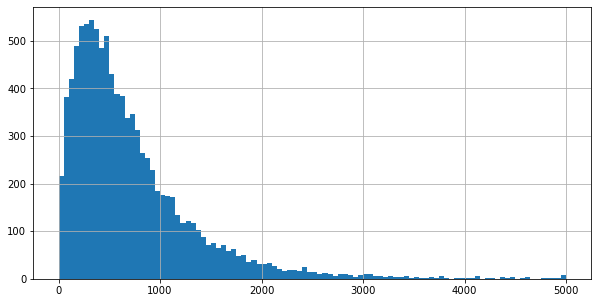

In [8]:
plt.figure(figsize = (10, 5))
df['lenght'].hist(bins = 100)

In [9]:
df.drop('business_id', axis = 1, inplace = True)
df.drop('user_id', axis = 1, inplace = True)
df.drop('review_id', axis = 1, inplace = True)
df.drop('type', axis = 1, inplace = True)

In [10]:
df.groupby('stars').mean()

,cool,useful,funny,lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:xlabel='stars'>

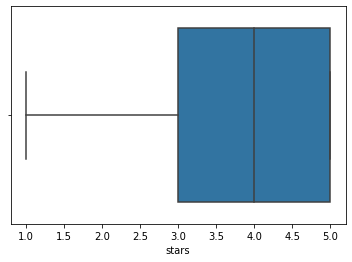

In [11]:
sns.boxplot(x = df['stars'])

<AxesSubplot:xlabel='stars', ylabel='lenght'>

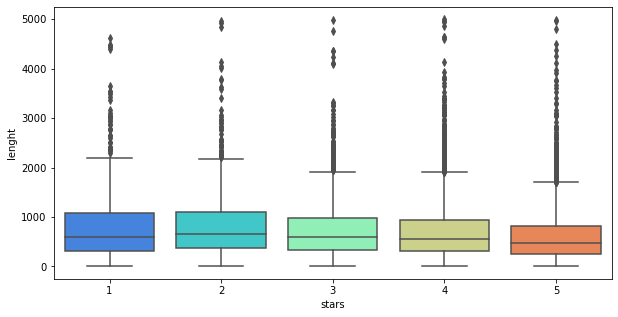

In [12]:
plt.figure(figsize = (10,5))
sns.boxplot(x='stars',y='lenght',data=df,palette='rainbow')

In [13]:
import string

str1 = df['text'][0]

In [14]:
import string
list1 = [char for char in str1 if char not in string.punctuation] 
list1 = ''.join(list1)

In [15]:
from nltk.corpus import stopwords

In [16]:
[word for word in list1.split() if word.lower() not in stopwords.words('english')]

['wife',
 'took',
 'birthday',
 'breakfast',
 'excellent',
 'weather',
 'perfect',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'grounds',
 'absolute',
 'pleasure',
 'waitress',
 'excellent',
 'food',
 'arrived',
 'quickly',
 'semibusy',
 'Saturday',
 'morning',
 'looked',
 'like',
 'place',
 'fills',
 'pretty',
 'quickly',
 'earlier',
 'get',
 'better',
 'favor',
 'get',
 'Bloody',
 'Mary',
 'phenomenal',
 'simply',
 'best',
 'Ive',
 'ever',
 'Im',
 'pretty',
 'sure',
 'use',
 'ingredients',
 'garden',
 'blend',
 'fresh',
 'order',
 'amazing',
 'EVERYTHING',
 'menu',
 'looks',
 'excellent',
 'white',
 'truffle',
 'scrambled',
 'eggs',
 'vegetable',
 'skillet',
 'tasty',
 'delicious',
 'came',
 '2',
 'pieces',
 'griddled',
 'bread',
 'amazing',
 'absolutely',
 'made',
 'meal',
 'complete',
 'best',
 'toast',
 'Ive',
 'ever',
 'Anyway',
 'cant',
 'wait',
 'go',
 'back']

In [17]:
def text_process(text):
    import string
    list1 = [char for char in text if char not in string.punctuation] 
    list1 = ''.join(list1)
    
    return [word for word in list1.split() if word.lower() not in stopwords.words('english')]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
df = df[(df['stars'] == 5) | (df['stars'] == 1)]

In [20]:
df['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [21]:
df_1 = df[df['stars'] == 1].sample(749)

df_5 = df[df['stars'] == 5].sample(749)

In [22]:
sample = pd.concat([df_1, df_5], axis = 0)

In [23]:
bow = CountVectorizer(analyzer=text_process).fit_transform(sample['text'])

In [24]:
bow

<1498x15839 sparse matrix of type '<class 'numpy.int64'>'
	with 88584 stored elements in Compressed Sparse Row format>

In [25]:
#bow1 = bow.transform(sample['text'])
print(bow)
print(bow.shape)

  (0, 11942)	1
  (0, 12204)	1
  (0, 13320)	1
  (0, 9489)	1
  (0, 15548)	1
  (0, 8371)	1
  (0, 13314)	1
  (0, 13001)	1
  (0, 7336)	1
  (1, 7856)	1
  (1, 7014)	1
  (1, 10508)	2
  (1, 14770)	1
  (1, 9746)	1
  (1, 7539)	1
  (1, 380)	1
  (1, 6091)	1
  (1, 13043)	2
  (1, 12239)	1
  (1, 14744)	1
  (1, 2387)	2
  (1, 8093)	1
  (1, 3872)	1
  (1, 13634)	1
  (1, 8027)	1
  :	:
  (1497, 7576)	1
  (1497, 3290)	1
  (1497, 3252)	1
  (1497, 7164)	1
  (1497, 5990)	1
  (1497, 5229)	1
  (1497, 8340)	1
  (1497, 604)	1
  (1497, 5310)	1
  (1497, 14905)	1
  (1497, 8522)	1
  (1497, 7357)	1
  (1497, 8883)	1
  (1497, 10645)	1
  (1497, 12327)	1
  (1497, 14724)	1
  (1497, 11085)	1
  (1497, 13130)	1
  (1497, 10823)	1
  (1497, 7266)	1
  (1497, 2168)	1
  (1497, 4794)	1
  (1497, 8015)	1
  (1497, 13784)	1
  (1497, 3755)	1
(1498, 15839)


In [26]:
print('Shape of Sparse Matrix: ', bow.shape)
print('Amount of Non-Zero occurences: ', bow.nnz)

Shape of Sparse Matrix:  (1498, 15839)
Amount of Non-Zero occurences:  88584


In [27]:
sparsity = (100.0 * bow.nnz / (bow.shape[0] * bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [29]:
tfidf = TfidfTransformer().fit_transform(bow)

In [30]:
print(tfidf.shape)

(1498, 15839)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
Xt, Xs, yt, ys = train_test_split(bow, sample['stars'], test_size=0.2, random_state=0)

In [33]:
nb = MultinomialNB().fit(Xt, yt)

In [34]:
pred = nb.predict(Xs)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(pred, ys))

              precision    recall  f1-score   support

           1       0.89      0.92      0.90       154
           5       0.91      0.88      0.90       146

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [38]:
Xt, Xs, yt, ys = train_test_split(sample['text'], sample['stars'], test_size=0.2, random_state=0)

In [39]:
pipeline.fit(Xt, yt)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000028DF090B940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [40]:
pred = pipeline.predict(Xs)
print(classification_report(pred, ys))

              precision    recall  f1-score   support

           1       0.91      0.90      0.91       162
           5       0.89      0.90      0.89       138

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

